In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsacademybr/PythonFundamentos/master/Cap11/pima-data.csv")

In [5]:
df.shape

(768, 10)

In [6]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [13]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [14]:
df.isnull().values.any()

False

In [40]:
def plot_corr(df, size=5):
    corr = df.corr()
    fig, ax = plt.subplots(figsize =  (size, size))
    print(fig, ax)
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr. columns)
    plt.yticks(range(len(corr.columns)), corr. columns)

Figure(360x360) AxesSubplot(0.125,0.125;0.775x0.755)


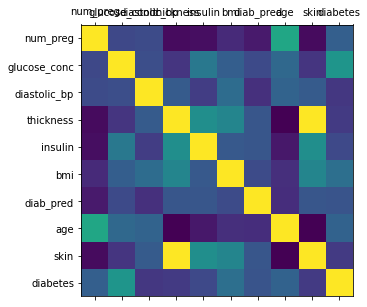

In [41]:
plot_corr(df)

In [26]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


In [5]:
diabetes_map = {True: 1, False: 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [29]:
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])

print("Cases True:", num_true, (num_true/(num_true + num_false))*100, "%")
print("Cases False:", num_false, (num_false/(num_false + num_true))*100, "%")

Cases True: 268 34.89583333333333 %
Cases False: 500 65.10416666666666 %


In [13]:
from sklearn.model_selection import train_test_split

In [6]:
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age']

In [7]:
atrib_prev = ['diabetes']

In [8]:
x = df[atributos].values
y = df[atrib_prev].values

In [11]:
split_test_size = 0.3

In [14]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = split_test_size, random_state = 42)

In [ ]:
# TRATANDO DADOS MISSING IMPUTE

In [28]:
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['age'] == 0])))

# Linhas no dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing age: 0


In [15]:
from sklearn.impute import SimpleImputer

In [16]:
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

X_treino = preenche_0.fit_transform(x_treino)
X_teste = preenche_0.fit_transform(x_teste)

In [39]:
X_treino

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
modelo_v1 = GaussianNB()

In [42]:
modelo_v1.fit(X_treino, y_treino.ravel())

GaussianNB()

In [23]:
from sklearn import metrics

In [56]:
nb_predict_train = modelo_v1.predict(X_treino)

In [57]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, nb_predict_train)))

Exatidão (Accuracy): 0.7542


In [61]:
nb_predict_test = modelo_v1.predict(X_teste)

In [63]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_teste, nb_predict_test)))
print()

Exatidão (Accuracy): 0.7359



In [66]:

# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
modulo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modulo_v3.fit(X_treino, y_treino.ravel())
lr_predict_test = modulo_v3.predict(X_teste)

In [24]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.7489

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.60      0.62        80
           0       0.80      0.83      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [26]:
import pickle

In [28]:
filename = 'modelo_treinado_v3.sav'
pickle.dump(modulo_v3, open(filename, 'wb'))

In [29]:
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print(resultado1)
print(resultado2)

[0]
[1]
